# Brooke Johnson
## Homework 1
MSDS 598 Spring 2022

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats

### Question 1
Consider an experiment where you randomly pick 10 people and write down their birthdays. Let X be the random variable that is 0 when nobody shares a birthday and is 1 when at least two people share a birthday in your sample. 
#### Part A: Describe the sample space of this experiment.

The sample space = {[1, 2, 3, 4, ....365] *10} The result of any randomly selected birthday per the lst array created below is that any integer between 1 & 365 may be drawn per person. For each of the ten the probability remains 1/365 since we are expecting it to be possible that some individuals will randomly share the same birthday. Furthermore, this array starts at 1 because a birthday of day 0 zero would not make sense. The sample space is an assortment of 10 numbers between 1 - 365

#### Part B: Simulate this experiment and use this simulation to estimate the probability distribution of random variable X. Use at least 10,000 trials. 


In [109]:
def checkIfDuplicates_3(list):
    for elem in list:
        if list.count(elem) >1:
            return True
    return False

sample_size = 10
num_experiments = 10000

value = []

for _ in range(num_experiments):
    lst = np.random.randint(low=1, high=366, size=sample_size)
    list = lst.tolist()
    result = checkIfDuplicates_3(list)
    if result:
        value.append(1)
    else:
        value.append(0) 
        
# code adapted from: https://thispointer.com/python-3-ways-to-check-if-there-are-duplicates-in-a-list/

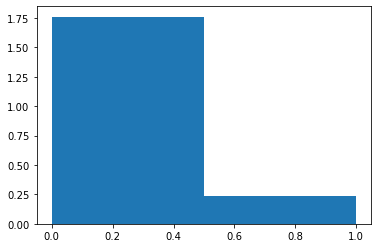

In [110]:
plt.hist(value, bins=2, range=(0,1), density=True)
plt.show()

### Question 2
Consider the Olympic Athlete Data from the January 31st Lecture.

#### Part A: Choose a country and set up a Hypothesis Test to decide whether a random sample of 100 athletes from that country have a mean *weight* different from the population mean. 

In [56]:
df = pd.read_csv('athlete_events.csv')

In [57]:
pd.unique(df['NOC'])
# choosing country(NOC) = Sweeden (SWE)

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [58]:
# subsetting the df
df_swe = df[df['NOC'] == 'SWE']
# find the population mean of all athletes
pop_mean = df['Height'].mean()
print(pop_mean)

175.33896987366376



$H_0: \mu_{\text{SWE_Sample}} = 175$

$H_a: \mu_{\text{SWE_Sample}} \neq 175$

Significane level $\alpha = 0.01$

In [80]:
df_sample = df_swe.sample(100)
sample_mean = df_sample['Height'].mean()
print(sample_mean)

177.84057971014494


The sample mean is different from the population mean. Now to identify if this result is statistically unusual. 

#### Part B: Calculate the p-value to determine whether to reject or fail to reject the null hypothesis with a significance level of $\alpha = 0.01$.

In [81]:
std_error = scipy.stats.sem(df_sample['Height'], nan_policy='omit')
std_error

1.1466663175578753

In [82]:
# caluculate the z-score
z = (sample_mean - pop_mean) / (std_error)

# calculate the area under the cumulative distribution of the z-score
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)
p = 2*p_left_of_z(-z)
p


0.02913632285484775

The calculated p-value is > 0.01 so we fail to reject the null hypothesis that the two means are the same. 

### Question 3 
Import the Advertising dataset found on Canvas looking at dollars spent by businesses on advertising in various mediums along with the associated sales that quarter. 

#### Part A: What variables in this dataset appear linearly correlated? Pick a pair that look linearly correlated and calculate the $R{^2}$ value for a line of best fit using OLS.

In [83]:
df_advert = pd.read_csv('Advertising.csv')
import seaborn as sns

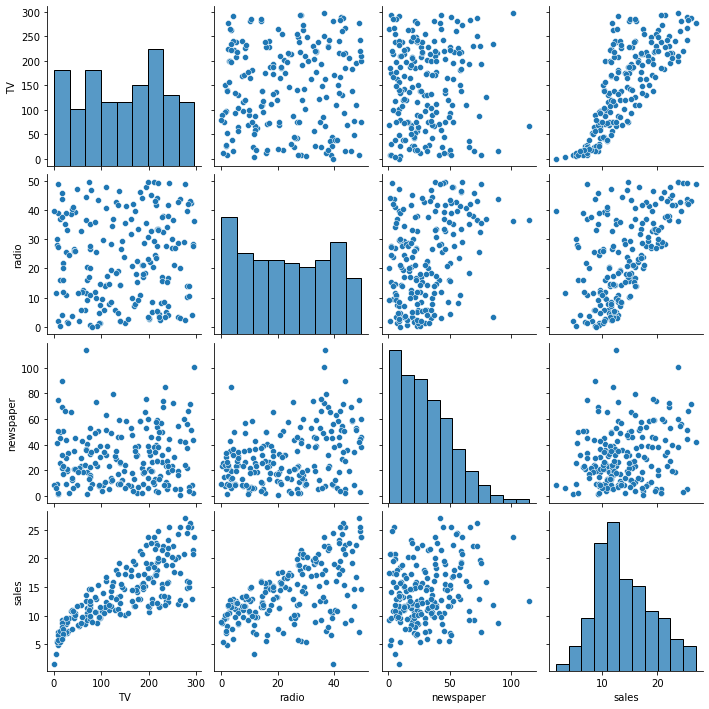

In [84]:
sns.pairplot(df_advert)

From this visual, the pairs that look somewhat linearly related are: sales&tv and sales&radio. I'm going to calculate the $R^{2}$ for sales&radio. 

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [86]:
model = ols(formula = 'sales ~ radio', data=df_advert)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.35e-19
Time:                        15:57:35   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^{2}$ value is 0.332 meaning that 33.2% of the variance is explained by the model. This is a sign that the model is not a good fit. 

#### Part B: Explain in your own words what the relationship between these two variables using the line of best fit. 

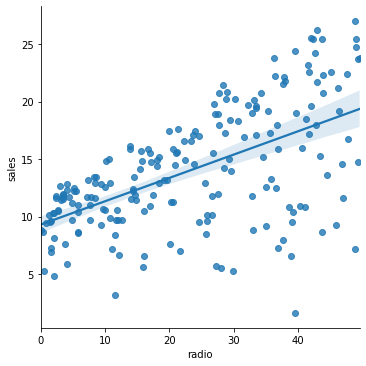

In [87]:
import seaborn as sns
sns.lmplot(x='radio',y='sales',data=df_advert)

The line of best fit shows a positive correlation between TV and Sales, suggesting that an increase in TV advertising will be associated with an increase in sales. When there are no TV advertisements sales are at approximately 9 units. 

### Question 4
Consider the TV and Sales Variables.

#### Part A: Are they linearly correlated? Are they correlated in some other way?

<AxesSubplot:xlabel='TV', ylabel='sales'>

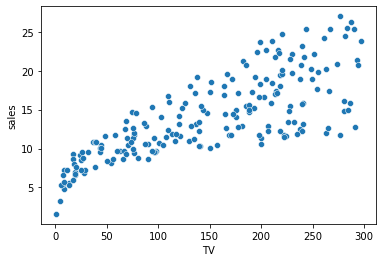

In [25]:
sns.scatterplot(x='TV',y='sales',data=df_advert)

It looks like TV & sales might be logarithmically correlated since it seems like there are decreasing rertuns to scale for TV advertisements on sales. 

#### Part B: How might we create (or *engineer*) a feature from the TV variable that was linearly correlated with sales?

We can transform the TV data using e, where e is raised to the negative power of the variable presenting TV (x). It might look like $e^{-x}$. This transformation method was referenced from this site: https://online.stat.psu.edu/stat501/lesson/9/9.4


### Question 5
Import the Penguins dataset we looked at in class on January 24th. 

#### Part A: Which other numerical variable predict bill length the best with a linear model? What is the $R^{2}$ for each of these?

In [88]:
df_penguins = sns.load_dataset('penguins')
df_penguins = df_penguins.dropna()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


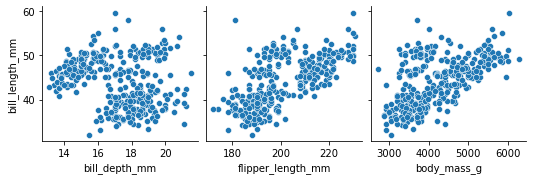

In [89]:
sns.pairplot(df_penguins,
             y_vars = ['bill_length_mm'],
             x_vars= ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

Body mass and flipper length look like they may have a relationship with bill length. 

In [90]:
model0 = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_penguins)
res = model0.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           7.21e-42
Time:                        15:59:22   Log-Likelihood:                -945.20
No. Observations:                 333   AIC:                             1894.
Df Residuals:                     331   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.2186      3.272     -2.206      0.028     -13.655      -0.783
flipper_length_mm     0.2548      0.016     15.691      0.000       0.223       0.287
==============================================================================
Omnibus:                       35.275   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.902
Skew:                           0.783   Prob(JB):                     1.78e-10
Kurtosis:                       3.886   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model1 = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=df_penguins)
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.53e-05
Time:                        15:59:25   Log-Likelihood:                -1028.8
No. Observations:                 333   AIC:                             2062.
Df Residuals:                     331   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.8909      2.567     21.380      0.000      49.840      59.941
bill_depth_mm    -0.6349      0.149     -4.273      0.000      -0.927      -0.343
==============================================================================
Omnibus:                        8.999   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.946
Skew:                           0.251   Prob(JB):                       0.0310
Kurtosis:                       2.501   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model2 = ols(formula = 'bill_length_mm ~ body_mass_g', data=df_penguins)
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.54e-32
Time:                        15:59:29   Log-Likelihood:                -966.71
No. Observations:                 333   AIC:                             1937.
Df Residuals:                     331   BIC:                             1945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.1507      1.292     21.021      0.000      24.610      29.692
body_mass_g     0.0040      0.000     13.276      0.000       0.003       0.005
==============================================================================
Omnibus:                       26.613   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.896
Skew:                           0.739   Prob(JB):                     1.95e-07
Kurtosis:                       3.208   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^{2}$ for flipper length = .427 or 42.7%, for body mass = .347 or 34.7%

#### Part B: What if we create a separate linear model for each *species* to predit bill lenght? Does the overall effectiveness of our model improve? Use $R^{2}$ values to make your decision.

In [93]:
df_adelie = df_penguins[df_penguins['species'] == "Adelie"]
df_adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


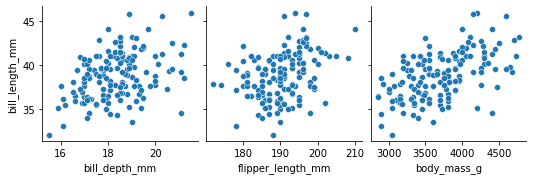

In [94]:
sns.pairplot(df_adelie,
             y_vars = ['bill_length_mm'],
             x_vars= ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [95]:
model3 = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_adelie)
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.87
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.18e-05
Time:                        15:59:42   Log-Likelihood:                -341.10
No. Observations:                 146   AIC:                             686.2
Df Residuals:                     144   BIC:                             692.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.0358      6.104      2.136      0.034       0.971      25.100
flipper_length_mm     0.1357      0.032      4.227      0.000       0.072       0.199
==============================================================================
Omnibus:                        0.156   Durbin-Watson:                   2.610
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.323
Skew:                          -0.002   Prob(JB):                        0.851
Kurtosis:                       2.770   Cond. No.                     5.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
model4 = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=df_adelie)
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     25.18
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.51e-06
Time:                        15:59:54   Log-Likelihood:                -337.88
No. Observations:                 146   AIC:                             679.8
Df Residuals:                     144   BIC:                             685.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.3668      3.087      7.570      0.000      17.265      29.468
bill_depth_mm     0.8425      0.168      5.018      0.000       0.511       1.174
==============================================================================
Omnibus:                        0.678   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.763
Skew:                           0.012   Prob(JB):                        0.683
Kurtosis:                       2.647   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model5 = ols(formula = 'bill_length_mm ~ body_mass_g', data=df_adelie)
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     60.61
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.24e-12
Time:                        15:59:57   Log-Likelihood:                -324.00
No. Observations:                 146   AIC:                             652.0
Df Residuals:                     144   BIC:                             658.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.1129      1.516     17.889      0.000      24.117      30.109
body_mass_g     0.0032      0.000      7.786      0.000       0.002       0.004
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.130
Skew:                          -0.060   Prob(JB):                        0.937
Kurtosis:                       2.918   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^{2}$ for flipper length for Adelie = .110 pr 11%, for bill depth = .149 or 14.9%, for body mass = .296 or 29.6%. These $R^{2}$ values show that these models are not a good fit.

In [98]:
df_chin = df_penguins[df_penguins['species'] == "Chinstrap"]
df_chin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male


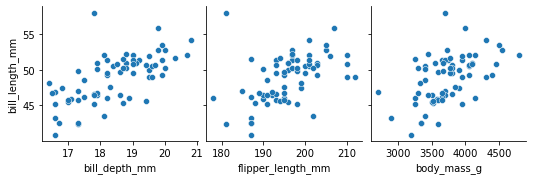

In [99]:
sns.pairplot(df_chin,
             y_vars = ['bill_length_mm'],
             x_vars= ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [100]:
model6 = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_chin)
res = model6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.88
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.92e-05
Time:                        16:00:05   Log-Likelihood:                -169.42
No. Observations:                  68   AIC:                             342.8
Df Residuals:                      66   BIC:                             347.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5934      9.959      0.562      0.576     -14.289      25.476
flipper_length_mm     0.2208      0.051      4.345      0.000       0.119       0.322
==============================================================================
Omnibus:                       18.050   Durbin-Watson:                   2.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.168
Skew:                           0.816   Prob(JB):                     5.15e-09
Kurtosis:                       6.288   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
model7 = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=df_chin)
res = model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     49.21
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.53e-09
Time:                        16:00:09   Log-Likelihood:                -159.03
No. Observations:                  68   AIC:                             322.1
Df Residuals:                      66   BIC:                             326.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4279      5.057      2.655      0.010       3.332      23.524
bill_depth_mm     1.9221      0.274      7.015      0.000       1.375       2.469
==============================================================================
Omnibus:                       14.567   Durbin-Watson:                   2.553
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.201
Skew:                           0.682   Prob(JB):                     1.24e-06
Kurtosis:                       5.782   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model8 = ols(formula = 'bill_length_mm ~ body_mass_g', data=df_chin)
res = model8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     23.65
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           7.48e-06
Time:                        16:00:11   Log-Likelihood:                -167.56
No. Observations:                  68   AIC:                             339.1
Df Residuals:                      66   BIC:                             343.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.1742      3.443      9.344      0.000      25.299      39.049
body_mass_g     0.0045      0.001      4.863      0.000       0.003       0.006
==============================================================================
Omnibus:                        2.589   Durbin-Watson:                   2.701
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.795
Skew:                           0.333   Prob(JB):                        0.408
Kurtosis:                       3.435   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$R^{2}$ for flipper length for Chinstrap = .222 pr 22.2%, for bill depth = .427 or 42.7%, for body mass = .264 or 26.4%. These $R^{2}$ values show that these models are not a particularly good fit. The models are less fitted to the data of Chinstrap than to the penguins as a whole.

In [103]:
df_gentoo = df_penguins[df_penguins['species'] == "Gentoo"]
df_gentoo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male


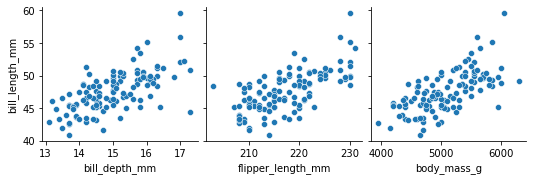

In [104]:
sns.pairplot(df_gentoo,
             y_vars = ['bill_length_mm'],
             x_vars= ['bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [105]:
model9 = ols(formula = 'bill_length_mm ~ flipper_length_mm', data=df_gentoo)
res = model9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     92.37
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.80e-16
Time:                        16:00:21   Log-Likelihood:                -268.60
No. Observations:                 119   AIC:                             541.2
Df Residuals:                     117   BIC:                             546.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.4879      7.084     -2.892      0.005     -34.518      -6.457
flipper_length_mm     0.3133      0.033      9.611      0.000       0.249       0.378
==============================================================================
Omnibus:                        4.254   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.775
Skew:                           0.325   Prob(JB):                        0.151
Kurtosis:                       3.582   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model10 = ols(formula = 'bill_length_mm ~ bill_depth_mm', data=df_gentoo)
res = model10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     87.45
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           7.34e-16
Time:                        16:00:25   Log-Likelihood:                -270.01
No. Observations:                 119   AIC:                             544.0
Df Residuals:                     117   BIC:                             549.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.6702      3.311      5.035      0.000      10.113      23.228
bill_depth_mm     2.0603      0.220      9.352      0.000       1.624       2.497
==============================================================================
Omnibus:                        5.717   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                8.687
Skew:                           0.080   Prob(JB):                       0.0130
Kurtosis:                       4.314   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
model11 = ols(formula = 'bill_length_mm ~ body_mass_g', data=df_gentoo)
res = model11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bill_length_mm   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     93.63
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.26e-16
Time:                        16:00:30   Log-Likelihood:                -268.24
No. Observations:                 119   AIC:                             540.5
Df Residuals:                     117   BIC:                             546.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.5379      2.184     12.152      0.000      22.213      30.863
body_mass_g     0.0041      0.000      9.676      0.000       0.003       0.005
==============================================================================
Omnibus:                        5.013   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.650
Skew:                           0.356   Prob(JB):                       0.0978
Kurtosis:                       3.657   Cond. No.                     5.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
r_data = [["Adelie", .110, .149, .296], ["Chinstrap", .222, .427, .264], ["Gentoo", .441, .428, .445], ["All", .427, .052, .347 ]]
df_x = pd.DataFrame(r_data, columns = ['Penguin Name', 'x = flipper lenght', 'x = bill depth', 'x = body mass'])
df_x

,Penguin Name,x = flipper lenght,x = bill depth,x = body mass
0,Adelie,0.110,0.149,0.296
1,Chinstrap,0.222,0.427,0.264
2,Gentoo,0.441,0.428,0.445
3,All,0.427,0.052,0.347


The only $R^{2}$ value that improved unilaterally across species when the model measures fit per species is the bill depth. This tells us that the model better explains the variation from bill depth better when analyzed by species. the other metrics did not improve or unambiguously improve. For example, we saw the $R^{2}$ gain some explanatory power for the Gentoo when measuring it's relationship with bill length, however, it reduced explanatory power for the other two species. 

Unless specifically interested in the relationship between bill length and bill depth, it does not value to the analysis to separate out by species. 